In [3]:
import pandas as pd
import os

In [5]:
os.getcwd()

'c:\\Users\\rypi3\\Documents\\Git\\data_golf\\Spark'

In [8]:
sparkrawdf = pd.read_csv('../data/GolfAnalysis - Spark.csv')
sparkrawdf.head()

,ROUND,SCORE,POS,PTS,BEST 10
0,Tue Apr 11,3,T9,13.0,13.0
1,Brookshire,NaN,NaN,NaN,NaN
2,Tue Apr 18,7,22,1.0,NaN
3,Brookshire,NaN,NaN,NaN,NaN
4,Tue Apr 25,4,T10,9.0,NaN


In [27]:
df = sparkrawdf.drop(sparkrawdf[(sparkrawdf['ROUND']) == 'Brookshire'].index)
df['SCORE'] = df['SCORE'].replace('E','0')
df['SCORE'] = df['SCORE'].astype(int)
df.dtypes

ROUND       object
SCORE        int32
POS         object
PTS        float64
BEST 10    float64
dtype: object

In [28]:
df.describe()

,SCORE,PTS,BEST 10
count,22.000000,22.000000,10.00000
mean,2.181818,22.318182,45.00000
std,3.033721,27.766692,27.13751
min,-4.000000,1.000000,13.00000
25%,0.250000,1.000000,25.25000
50%,2.500000,9.500000,40.00000
75%,4.000000,35.000000,57.50000
max,7.000000,95.000000,95.00000


<AxesSubplot:>

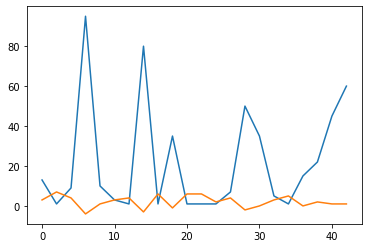

In [34]:
df.PTS.plot()
df.SCORE.plot()


The lower my score is, the higher my score is. This is because golf prioritizes lower scores for assigning the most points.

In [30]:
df.corr('pearson',10)

,SCORE,PTS,BEST 10
SCORE,1.000000,-0.850369,-0.799049
PTS,-0.850369,1.000000,1.000000
BEST 10,-0.799049,1.000000,1.000000


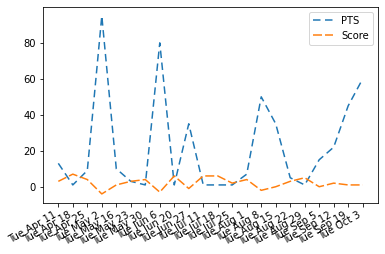

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

x = df.ROUND
y = df.PTS
y2 = df.SCORE

fig, ax = plt.subplots()

# Using set_dashes() to modify dashing of an existing line
line1, = ax.plot(x, y, dashes=[5,3], label='PTS')
#line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

# Using plot(..., dashes=...) to set the dashing when creating a line
line2, = ax.plot(x, y2, dashes=[6, 2], label='Score')


fig.autofmt_xdate()

ax.legend()
plt.show()